In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dss = pd.read_csv('./data/merged_data.csv')

dss.head()



FileNotFoundError: [Errno 2] No such file or directory: './data/merged_data.csv'

- How many rows and columns?
In the below list, I compare the before and after list of all columns. As you can see there's a lot of columns with very few data entries (main_property_data.csv), or no relevance to the price. In the list underneath that ('merged_data.csv'), you can see the updated columns, after cleaning up the data.

In [ ]:
ds = pd.read_csv('./data/main_property_data.csv')
ds.drop('Raw num:', inplace=True, axis=1)
dss = pd.read_csv('./data/merged_data.csv')
print(ds.count(), '\n')
print(dss.count())


Locality                                11188
Zip code                                11188
Kitchen                                  9844
Type of property                        11188
Subtype of property                     11188
Price of property in euro               11188
Type of Sale                             2462
Number of bedrooms                      11188
Living area                             11014
Terrace                                  8300
Garden                                   2879
Garden area                              2879
Surface of the land(or plot of land)     5808
Number of facades                        9079
Swimming pool                             348
ID number                               11188
State of the building                    9899
URL                                     11188
dtype: int64 

Zip code       11187
Kitchen        11187
type           11187
subtype        11187
price          11187
bedrooms       11187
Living area    11013
Terrace   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


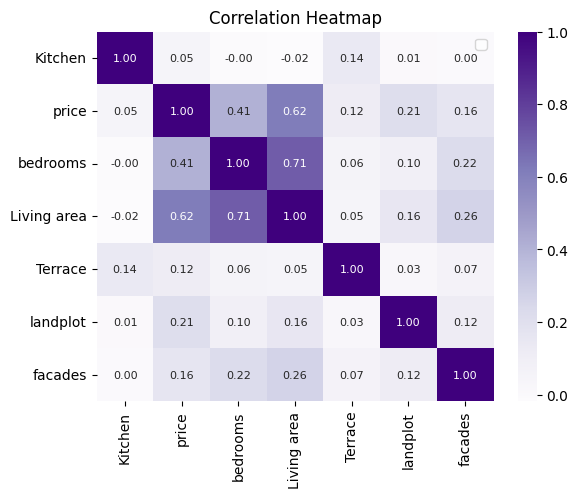

In [ ]:
dss = pd.read_csv('./data/merged_data.csv')
dss.drop('Zip code', inplace=True, axis=1)
graph_mx = dss.corr(numeric_only=True)
graph = sns.heatmap(graph_mx, annot=True, annot_kws={"size": 8}, fmt='.2f', cmap='Purples')
graph.set(title='Correlation Heatmap')

(0.0, 400.0)

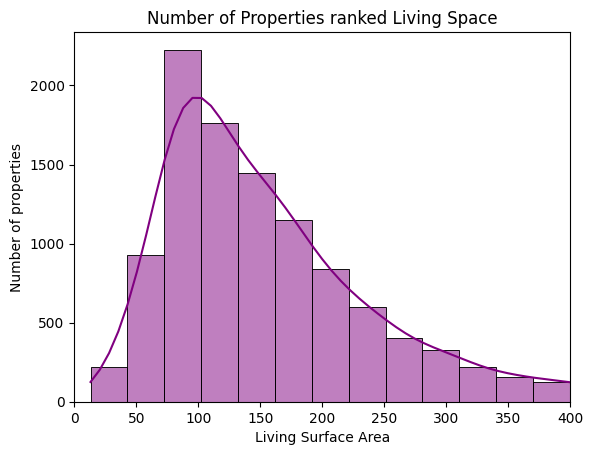

In [ ]:
dss = pd.read_csv('./data/merged_data.csv')
graph = sns.histplot(data=dss, x='Living area', kde=True, bins=50, color='Purple')
graph.set(xlabel='Living Surface Area', ylabel='Number of properties', title='Number of Properties ranked Living Space')
graph.set_xlim(0, 400)

[Text(0.5, 0, 'Price(in million)'),
 Text(0, 0.5, 'Housing Sub-Type'),
 Text(0.5, 1.0, 'House Pricing per Sub-Type')]

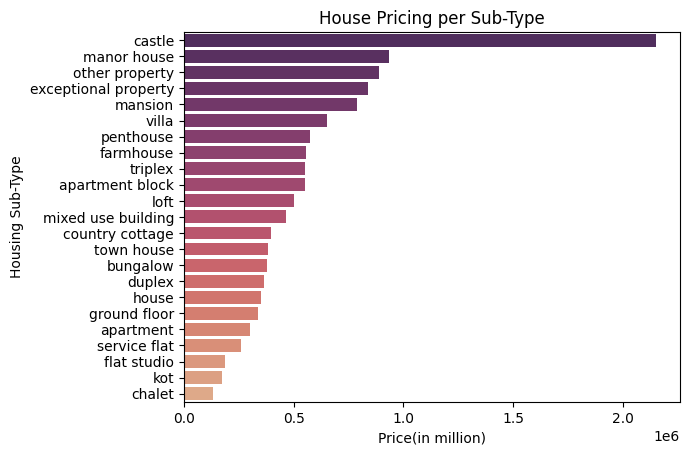

In [ ]:
dss = pd.read_csv('./data/merged_data.csv')
test = dss.groupby('subtype')['price'].median().sort_values(ascending=False).index
graph = sns.barplot(data=dss, x='price', y='subtype', order=test, palette='flare_r', estimator='median', errorbar=None)
graph.set(xlabel='Price(in million)', ylabel='Housing Sub-Type', title='House Pricing per Sub-Type')
#graph.set_xticklabels(graph.get_xticklabels(), rotation=40, ha='right')

Text(0.53, 0.98, 'Bedrooms to Price Correlation')

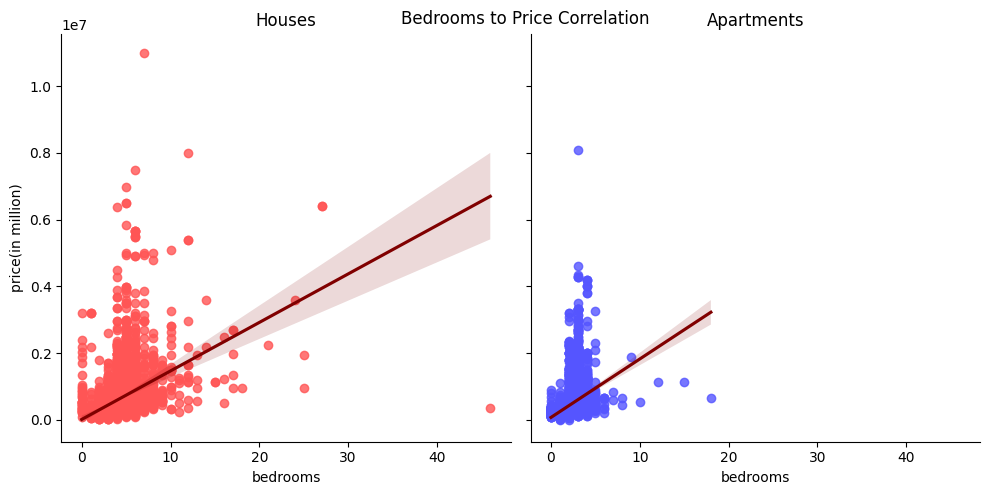

In [ ]:
graph = sns.lmplot(x='bedrooms', y='price', data=ds, hue='type', palette='seismic', line_kws={'color': 'maroon'}, col='type', col_order=['house', 'apartment'])
graph.set(xlabel = 'bedrooms', ylabel = 'price(in million)', title= 'bedroom # to price correlation')
graph.fig.axes[0].set_title('Houses')
graph.fig.axes[1].set_title('Apartments')
graph.fig.suptitle('Bedrooms to Price Correlation', x=0.53)

Text(0.53, 0.98, 'Living Area to Price Correlation')

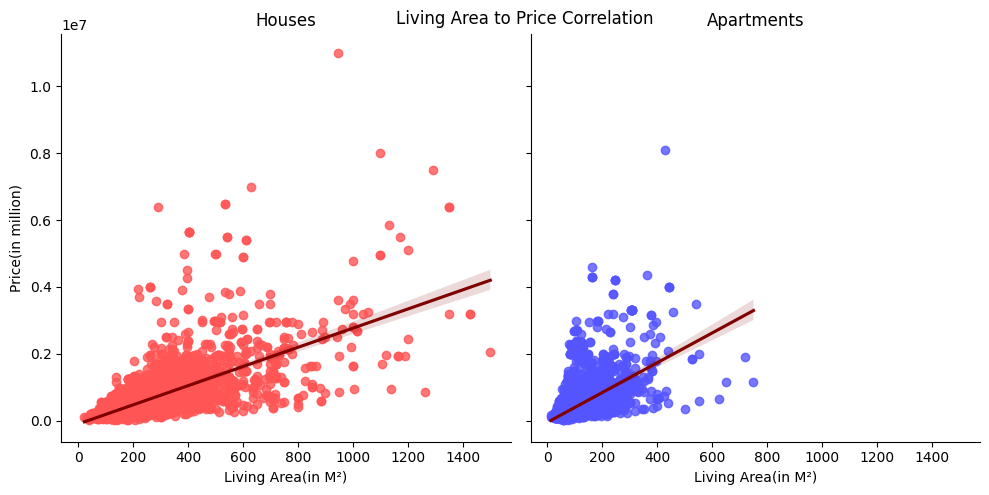

In [ ]:
dss = pd.read_csv('./data/merged_data.csv')
graph = sns.lmplot(data=dss, x='Living area', y='price', hue='type', palette='seismic', line_kws={'color': 'maroon'}, col='type', col_order=['house', 'apartment'])
graph.set(xlabel = 'Living Area(in M²)', ylabel = 'Price(in million)', title= 'Living Area to Price')
graph.fig.axes[0].set_title('Houses')
graph.fig.axes[1].set_title('Apartments')
graph.fig.suptitle('Living Area to Price Correlation', x=0.53)

[Text(0.5, 0, 'Number of properties'),
 Text(0, 0.5, 'Province'),
 Text(0.5, 1.0, 'Properties per Province')]

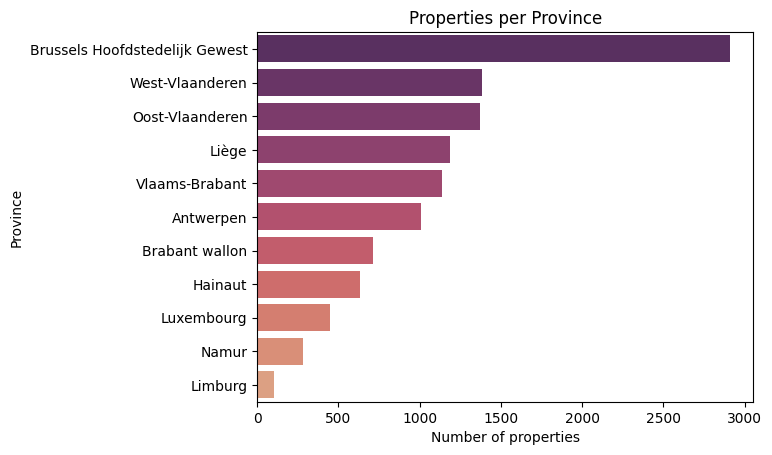

In [ ]:
dss = pd.read_csv('./data/merged_data.csv')
graph = sns.countplot(y='province', data=dss, palette='flare_r', order=dss['province'].value_counts().index)
graph.set(xlabel='Number of properties', ylabel='Province', title='Properties per Province')


[Text(0.5, 0, 'Number of properties'),
 Text(0, 0.5, 'Province'),
 Text(0.5, 1.0, 'Properties per Province by Type')]

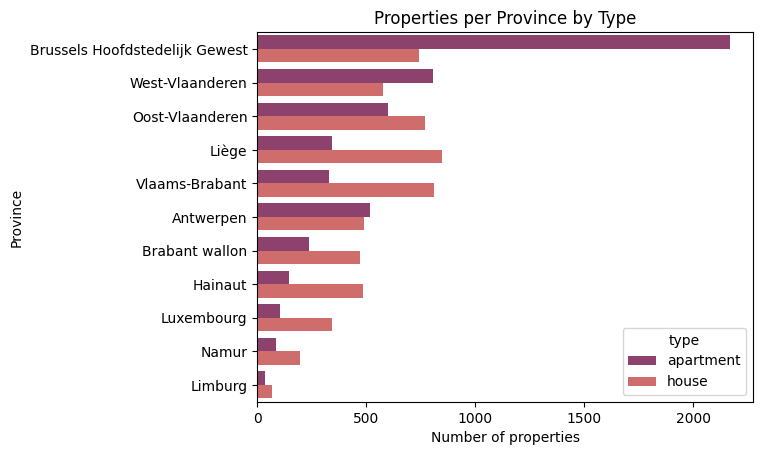

In [ ]:
dss = pd.read_csv('./data/merged_data.csv')
overall = dss['province'].value_counts().index
graph = sns.countplot(y='province', data=dss, order=overall, hue='type', palette='flare_r')
graph.set(xlabel='Number of properties', ylabel='Province', title='Properties per Province by Type')

(100000.0, 1100000.0)

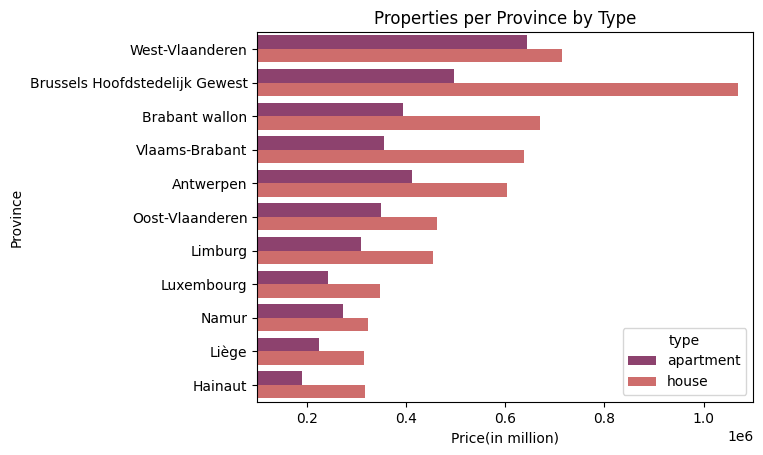

In [ ]:
dss = pd.read_csv('./data/merged_data.csv')
overall = dss.groupby('province')['price'].mean().sort_values(ascending=False).index
graph = sns.barplot(data=dss, x='price', y='province', order=overall, hue='type', palette='flare_r', estimator='mean', errorbar=None)
graph.set(xlabel='Price(in million)', ylabel='Province', title='Properties per Province by Type and Price')
graph.set_xlim(100000, 1100000)

(100000.0, 1000000.0)

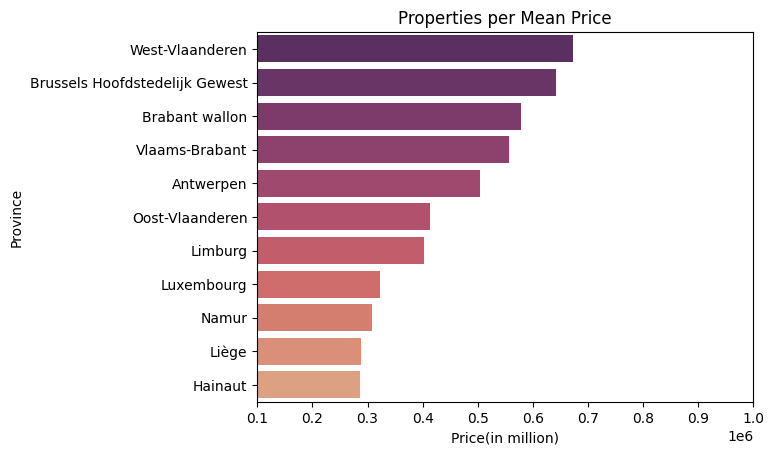

In [ ]:
graph = sns.barplot(x='price', y='province', data=dss, palette='flare_r', order=dss.groupby('province')['price'].mean().sort_values(ascending=False).index, estimator='mean', errorbar=None)
graph.set(xlabel='Price(in million)', ylabel='Province', title='Properties per Mean Price')
graph.set_xlim(100000, 1000000)

(100000.0, 1000000.0)

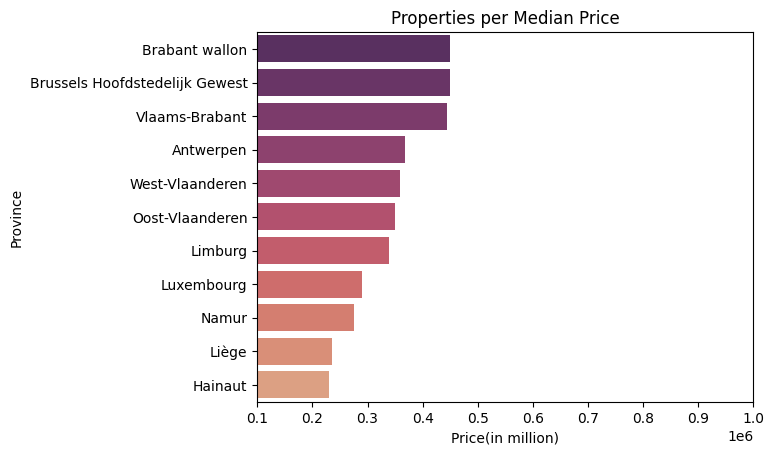

In [ ]:
graph = sns.barplot(x='price', y='province', data=dss, palette='flare_r', order=dss.groupby('province')['price'].median().sort_values(ascending=False).index, estimator='median', errorbar=None)
graph.set(xlabel='Price(in million)', ylabel='Province', title='Properties per Median Price')
graph.set_xlim(100000, 1000000)